In [1]:
#import the Pandas library and read the airline passenger data into a data frame:
import pandas as pd
df = pd.read_csv("AirPassengers.csv")

In [2]:
#Display the first 5 records
print(df.head())

     Month  #Passengers
0  1949-01          112
1  1949-02          118
2  1949-03          132
3  1949-04          129
4  1949-05          121


In [3]:
#Display the last 5 records
print(df.tail())

       Month  #Passengers
139  1960-08          606
140  1960-09          508
141  1960-10          461
142  1960-11          390
143  1960-12          432


In [4]:
# convert the month column into a datetime object
df['Month'] = pd.to_datetime(df['Month'], format='%Y-%m')

# convert the month column to an index
df.index = df['Month']
del df['Month']
print(df.head())

            #Passengers
Month                  
1949-01-01          112
1949-02-01          118
1949-03-01          132
1949-04-01          129
1949-05-01          121


In [5]:
#Generate a time series plot using Seaborn and Matplotlib. This will allow us to visualize time series data.
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\User\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Month', ylabel='Number of Passengers'>

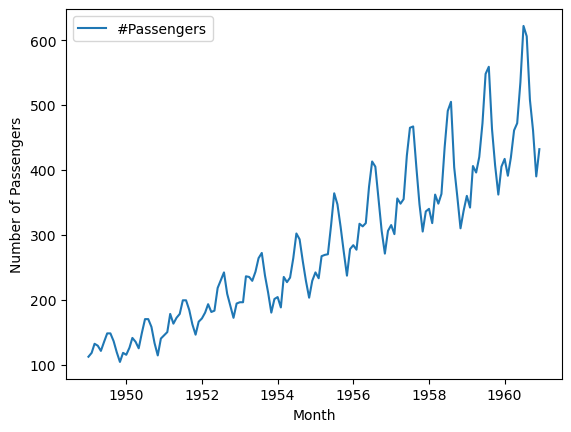

In [6]:
plt.ylabel('Number of Passengers')
sns.lineplot(df)

In [14]:
#DECOMPOSITION
#pass our data frame into the seasonal_decompose method and plot the result:

from statsmodels.tsa.seasonal import seasonal_decompose

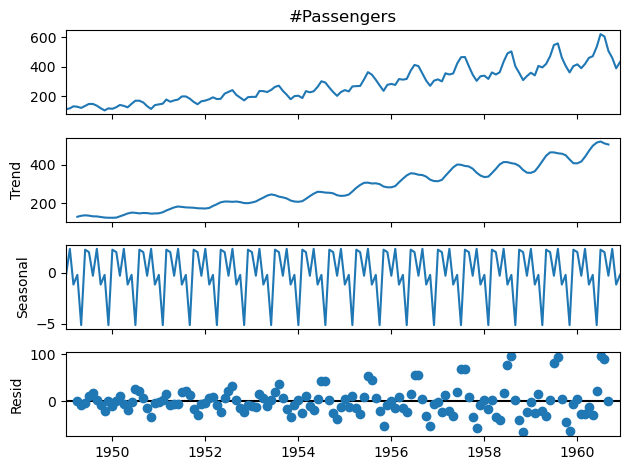

In [8]:
decompose = seasonal_decompose(df['#Passengers'],model='additive',
period=7)
decompose.plot()
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_18660\2549470539.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['train'] = train['#Passengers']
C:\Users\User\AppData\Local\Temp\ipykernel_18660\2549470539.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['test'] = test['#Passengers']


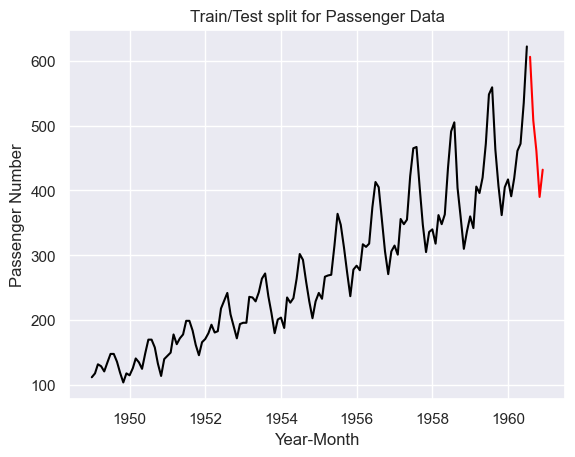

In [16]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')]
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']
test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')]
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']
plt.plot(train, color = "black")
plt.plot(test, color = "red")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
sns.set()
plt.show()

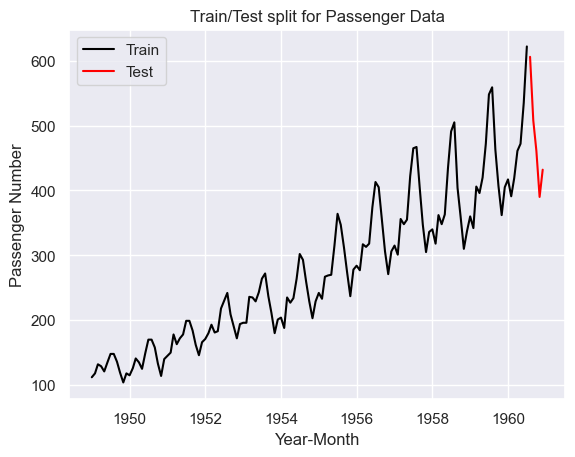

In [15]:
df['Date'] = df.index
train = df[df['Date'] < pd.to_datetime("1960-08", format='%Y-%m')].copy()
train['train'] = train['#Passengers']
del train['Date']
del train['#Passengers']

test = df[df['Date'] >= pd.to_datetime("1960-08", format='%Y-%m')].copy()
del test['Date']
test['test'] = test['#Passengers']
del test['#Passengers']

plt.plot(train['train'], color="black", label="Train")
plt.plot(test['test'], color="red", label="Test")
plt.title("Train/Test split for Passenger Data")
plt.ylabel("Passenger Number")
plt.xlabel('Year-Month')
plt.legend()
sns.set()
plt.show()

In [10]:
!pip install pmdarima

In [11]:
from pmdarima.arima import auto_arima
model = auto_arima(train, trace=True, error_action='ignore',
suppress_warnings=True)
model.fit(train)
forecast = model.predict(n_periods=len(test))
forecast = pd.DataFrame(forecast,index =
test.index,columns=['Prediction'])

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.76 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1352.593, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1340.702, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1336.259, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1352.415, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1329.986, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.40 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1335.098, Time=0.17 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1336.923, Time=0.20 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1329.407, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1335.407, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1339.796, Time=0.07 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1325.560, Time=0.18 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1336.3

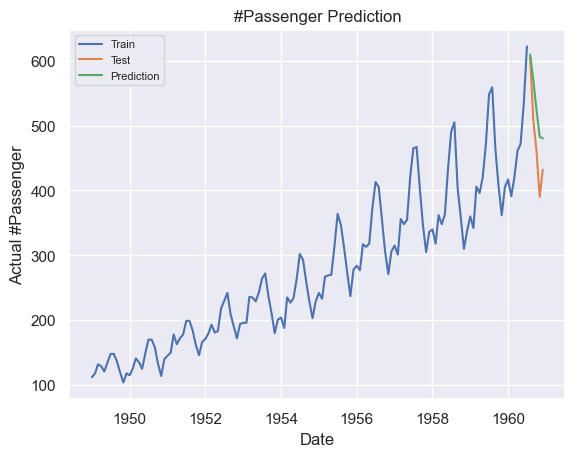

In [12]:
#Display the output 
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(forecast, label='Prediction')
plt.title('#Passenger Prediction')
plt.xlabel('Date')
plt.ylabel('Actual #Passenger')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rms = sqrt(mean_squared_error(test,forecast))
print("RMSE: ", rms)

RMSE:  61.363740261818016
